In [14]:
# Re-run after state reset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def lorentzian(f, fr, gamma):
    return 1 / np.sqrt(1 + ((f - fr) / gamma) ** 2)

def panel(title, fr, gamma, path, show_3db=False):
    f = np.linspace(fr - 2.0, fr + 2.0, 2000)
    A = lorentzian(f, fr, gamma)
    Amax = A.max()
    A3db = Amax * 10**(-3/20)
    idx = np.where(A >= A3db)[0]
    f1, f2 = f[idx[0]], f[idx[-1]]
    BW = f2 - f1

    fig = plt.figure(figsize=(6,3))  # single chart (no subplots)
    ax = fig.add_subplot(111)
    ax.plot(f, A, color="black", linewidth=2)
    ax.set_title(title, color="black", pad=8)
    ax.set_xlabel("Frequency", color="black")
    ax.set_ylabel("Amplitude", color="black")
    ax.tick_params(colors="black")
    for spine in ax.spines.values():
        spine.set_color("black")
    #ax.axvline(fr, ymin=0, ymax=0.95, linestyle="-", linewidth=1, color="black")
    ax.text(fr, ax.get_ylim()[0] + 0.05*(ax.get_ylim()[1]-ax.get_ylim()[0]), r"$f_r$",
            ha="center", va="bottom", color="black")
    ax.hlines(A3db, f1, f2, linestyles="dashed", linewidth=1, color="black")
    ax.annotate("", xy=(f2, A3db), xytext=(f1, A3db),
                arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
    ax.text((f1+f2)/2, A3db - 0.07*(ax.get_ylim()[1]-ax.get_ylim()[0]), "BW",
            ha="center", va="top", color="black")
    if show_3db:
        ax.annotate("", xy=(fr+0.25*BW, Amax), xytext=(fr+0.25*BW, A3db),
                    arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
        ax.text(fr+0.27*BW, (Amax+A3db)/2, "3 dB", rotation=90, va="center", ha="left", color="black")
        ax.hlines(Amax, fr-0.6*BW, fr+0.6*BW, linestyles="dashed", linewidth=1, color="black")
    ax.set_xlim(fr - 2.0, fr + 2.0)
    ax.set_ylim(0, 1.15*Amax)
    ax.grid(False)
    plt.tight_layout()
    fig.savefig(path, dpi=220, bbox_inches="tight", facecolor="white")
    plt.close(fig)
    return path




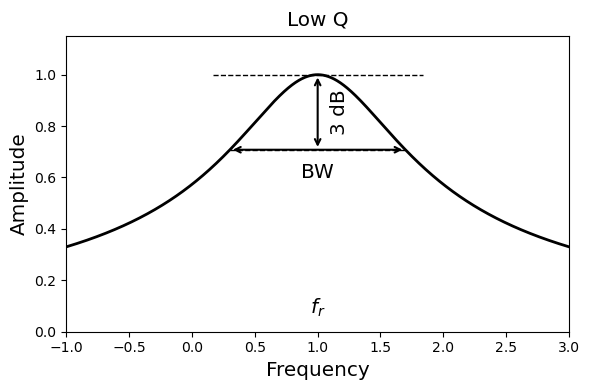

In [22]:

title = "Low Q"
fr=1.0
gamma=0.7
path1="./panel_low.png"
f = np.linspace(fr - 2.0, fr + 2.0, 2000)
A = lorentzian(f, fr, gamma)
Amax = A.max()
A3db = Amax * 10**(-3/20)
idx = np.where(A >= A3db)[0]
f1, f2 = f[idx[0]], f[idx[-1]]
BW = f2 - f1
figheight= 4
fig = plt.figure(figsize=(6,figheight))  # single chart (no subplots)
ax = fig.add_subplot(111)
ax.plot(f, A, color="black", linewidth=2)
ax.set_title(title, color="black", pad=8, size='x-large')
ax.set_xlabel("Frequency", color="black", size='x-large')
ax.set_ylabel("Amplitude", color="black", size='x-large')
ax.tick_params(colors="black")
for spine in ax.spines.values():
    spine.set_color("black")
#ax.axvline(fr, ymin=0, ymax=0.95, linestyle="-", linewidth=1, color="black")
#ax.text(fr, ax.get_ylim()[0] + 0.0001*(ax.get_ylim()[1]-ax.get_ylim()[0]), r"$f_r$",
        #ha="center", va="bottom", color="black")
ax.text(fr, .05, r"$f_r$",
        ha="center", va="bottom", color="black", size='x-large')
ax.hlines(A3db, f1, f2, linestyles="dashed", linewidth=1, color="black")
ax.annotate("", xy=(f2, A3db), xytext=(f1, A3db),
            arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
ax.text((f1+f2)/2, A3db - 0.07*(ax.get_ylim()[1]-ax.get_ylim()[0]), "BW",
        ha="center", va="top", color="black", size='x-large')

ax.annotate("", xy=(fr+0*BW, Amax), xytext=(fr+0*BW, A3db),
            arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
ax.text(fr+0.07*BW, (Amax+A3db)/2, "3 dB", rotation=90, va="center", ha="left", color="black", size='x-large')
ax.hlines(Amax, fr-0.6*BW, fr+0.6*BW, linestyles="dashed", linewidth=1, color="black")
ax.set_xlim(fr - 2.0, fr + 2.0)
ax.set_ylim(0, 1.15*Amax)
ax.grid(False)
plt.tight_layout()
fig.savefig(path1, dpi=220, bbox_inches="tight", facecolor="white")




In [23]:
ax.get_ylim()

(np.float64(0.0), np.float64(1.1499988253580617))

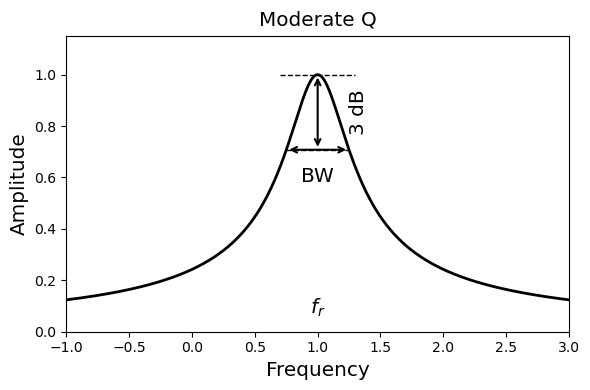

In [24]:
title = "Moderate Q"
fr=1.0
gamma=0.25
path2="./panel_mod.png"

f = np.linspace(fr - 2.0, fr + 2.0, 2000)
A = lorentzian(f, fr, gamma)
Amax = A.max()
A3db = Amax * 10**(-3/20)
idx = np.where(A >= A3db)[0]
f1, f2 = f[idx[0]], f[idx[-1]]
BW = f2 - f1

fig = plt.figure(figsize=(6,figheight))  # single chart (no subplots)
ax = fig.add_subplot(111)
ax.plot(f, A, color="black", linewidth=2)
ax.set_title(title, color="black", pad=8, size='x-large')
ax.set_xlabel("Frequency", color="black", size='x-large')
ax.set_ylabel("Amplitude", color="black", size='x-large')
ax.tick_params(colors="black")
for spine in ax.spines.values():
    spine.set_color("black")
#ax.axvline(fr, ymin=0, ymax=0.95, linestyle="-", linewidth=1, color="black")
ax.text(fr, .05, r"$f_r$",
        ha="center", va="bottom", color="black", size='x-large')
ax.hlines(A3db, f1, f2, linestyles="dashed", linewidth=1, color="black")
ax.annotate("", xy=(f2, A3db), xytext=(f1, A3db),
            arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
ax.text((f1+f2)/2, A3db - 0.07*(ax.get_ylim()[1]-ax.get_ylim()[0]), "BW",
        ha="center", va="top", color="black", size='x-large')

ax.annotate("", xy=(fr+0*BW, Amax), xytext=(fr+0*BW, A3db),
            arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
ax.text(fr+0.5*BW, (Amax+A3db)/2, "3 dB", rotation=90, va="center", ha="left", color="black", size='x-large')
ax.hlines(Amax, fr-0.6*BW, fr+0.6*BW, linestyles="dashed", linewidth=1, color="black")
ax.set_xlim(fr - 2.0, fr + 2.0)
ax.set_ylim(0, 1.15*Amax)
ax.grid(False)
plt.tight_layout()
fig.savefig(path2, dpi=220, bbox_inches="tight", facecolor="white")

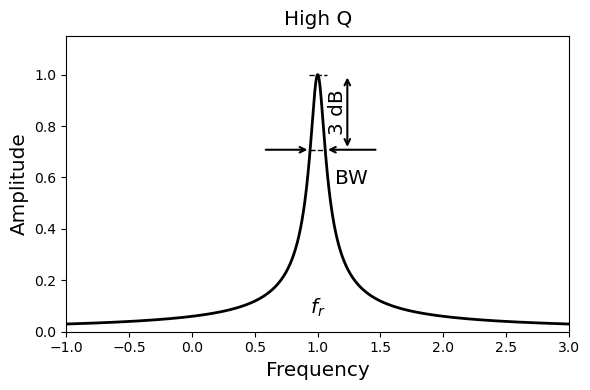

In [25]:
title = "High Q"
fr=1.0
gamma=0.06
path3="./panel_high.png"
f = np.linspace(fr - 2.0, fr + 2.0, 2000)
A = lorentzian(f, fr, gamma)
Amax = A.max()
A3db = Amax * 10**(-3/20)
idx = np.where(A >= A3db)[0]
f1, f2 = f[idx[0]], f[idx[-1]]
BW = f2 - f1

fig = plt.figure(figsize=(6,figheight))  # single chart (no subplots)
ax = fig.add_subplot(111)
ax.plot(f, A, color="black", linewidth=2)
ax.set_title(title, color="black", pad=8, size='x-large')
ax.set_xlabel("Frequency", color="black", size='x-large')
ax.set_ylabel("Amplitude", color="black", size='x-large')
ax.tick_params(colors="black")
for spine in ax.spines.values():
    spine.set_color("black")
#ax.axvline(fr, ymin=0, ymax=0.95, linestyle="-", linewidth=1, color="black")
ax.text(fr, .05, r"$f_r$",
        ha="center", va="bottom", color="black", size='x-large')
ax.hlines(A3db, f1, f2, linestyles="dashed", linewidth=1, color="black")
ax.annotate("", xy=(f2*1.4, A3db), xytext=(f2, A3db),
            arrowprops=dict(arrowstyle="<-", lw=1.5, color="black"))
ax.annotate("", xy=(f1*.6, A3db), xytext=(f1, A3db),
            arrowprops=dict(arrowstyle="<-", lw=1.5, color="black"))
ax.text(f2*1.2, A3db - 0.07*(ax.get_ylim()[1]-ax.get_ylim()[0]), "BW",
        ha="center", va="top", color="black", size='x-large')

ax.annotate("", xy=(fr+2*BW, Amax), xytext=(fr+2*BW, A3db),
            arrowprops=dict(arrowstyle="<->", lw=1.5, color="black"))
ax.text(fr+0.7*BW, (Amax+A3db)/2, "3 dB", rotation=90, va="center", ha="left", color="black", size='x-large')
ax.hlines(Amax, fr-0.6*BW, fr+0.6*BW, linestyles="dashed", linewidth=1, color="black")
ax.set_xlim(fr - 2.0, fr + 2.0)
ax.set_ylim(0, 1.15*Amax)
ax.grid(False)
plt.tight_layout()
fig.savefig(path3, dpi=220, bbox_inches="tight", facecolor="white")

In [26]:

imgs = [Image.open(p) for p in (path1, path2, path3)]
heights = [im.height for im in imgs]
max_h = max(heights)
resized = []
for im in imgs:
    new_im = Image.new("RGB", (im.width, max_h), (255,255,255))
    top = (max_h - im.height)//2
    new_im.paste(im, (0, top))
    resized.append(new_im)

gap = 20
total_w = sum(im.width for im in resized) + gap*2
canvas = Image.new("RGB", (total_w, max_h), (255,255,255))
x = 0
for i, im in enumerate(resized):
    canvas.paste(im, (x, 0))
    x += im.width + gap
final_path = "./resonance_triptych_black.png"
canvas.save(final_path)

final_path


'./resonance_triptych_black.png'